In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 1 Data Preparation

In [2]:
df = pd.read_csv('G:/我的云端硬盘/NTU/Trimester 1/Data Analysis/group project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,284315
1,492


In [6]:
print('Fraud proportion takes up {}%'.format(round(df['Class'].value_counts().values[1]/len(df['Class']) * 100, 4)))

Fraud proportion takes up 0.1727%


# 2 Data Processing 
## 2.1 Handeling Imbalanced Dataset Methods
**SMOTE**: 

In [7]:
X = df.drop('Class', axis = 1)
y = df.Class

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SMOTE
sm = SMOTE(random_state = 0)
X_sampled_smote, y_sampled_smote = sm.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sampled_smote, y_sampled_smote, test_size = 0.2, random_state = 0)

print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0: 227454, 1: 391})
After performing smote :  Counter({1: 182071, 0: 181855})


# 3 Supervised Learning 

In [8]:
def confusion_matrix(test_y, pred_y):
    print("Classification accuracy is: \n", metrics.confusion_matrix(test_y, pred_y, normalize='all'))
    cf_matrix = metrics.confusion_matrix(test_y, pred_y)
    print("Confusion Matrix is: \n", cf_matrix)
    print("Classification report is: \n", classification_report(test_y, pred_y))
    
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion Matrix with Normalization")
    plt.xlabel("Predicated Label")
    plt.ylabel("True Label")
    plt.show()

## 3.1 Logistic Regression

Logistic Regression without using smote
Classification accuracy is: 
 [[9.98068888e-01 1.58000070e-04]
 [7.72444788e-04 1.00066711e-03]]
Confusion Matrix is: 
 [[56852     9]
 [   44    57]]
Classification report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.56      0.68       101

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



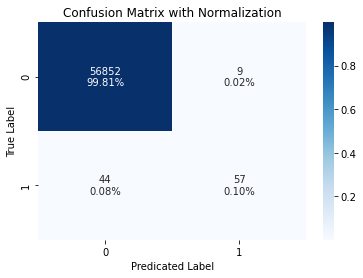

Accuracy (R^2) of Train Dataset:  0.9991573218635476
Accuracy (R^2) of Test Dataset:  0.9990695551420246
Prediction that is classfied as 1 takes up 0.1159%

 Logistic Regression with using smote
Classification accuracy is: 
 [[0.49106417 0.01012288]
 [0.01958629 0.47922666]]
Confusion Matrix is: 
 [[44678   921]
 [ 1782 43601]]
Classification report is: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     45599
           1       0.98      0.96      0.97     45383

    accuracy                           0.97     90982
   macro avg       0.97      0.97      0.97     90982
weighted avg       0.97      0.97      0.97     90982



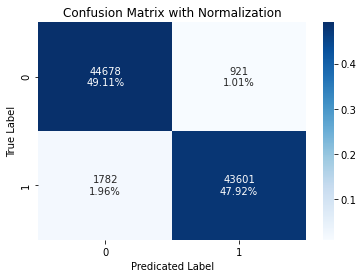

Accuracy (R^2) of Train Dataset:  0.9712029368607904
Accuracy (R^2) of Test Dataset:  0.9702908267569409
Prediction that is classfied as 1 takes up 51.065%


In [33]:
# Without smote
print('Logistic Regression without using smote')
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_y_pred_prob = lr_model.predict_proba(X_test) # Predict probabilities
lr_y_pred_prob = lr_y_pred_prob[:, 1] # Keep probabilities for the positive outcome only
confusion_matrix(y_test, lr_y_pred)
# Accuracy
print("Accuracy (R^2) of Train Dataset: ", lr_model.score(X_train, y_train))
print("Accuracy (R^2) of Test Dataset: ", lr_model.score(X_test, y_test))
# Prediction Distribution 
print('Prediction that is classfied as 1 takes up', '{}%'.format(round(list(Counter(lr_y_pred).values())[1]/ sum(list(Counter(lr_y_pred).values())) * 100, 4)))

# With smote
print('\n Logistic Regression with using smote')
lr_smote_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_smote = lr_smote_model.fit(X_train_smote, y_train_smote)
lr_smote_pred = lr_smote.predict(X_test_smote)
lr_smote_pred_prob = lr_smote.predict_proba(X_test_smote) # Predict probabilities
lr_smote_pred_prob = lr_smote_pred_prob[:, 1] # Keep probabilities for the positive outcome only
confusion_matrix(y_test_smote, lr_smote_pred)
# Accuracy
print("Accuracy (R^2) of Train Dataset: ", lr_smote_model.score(X_train_smote, y_train_smote))
print("Accuracy (R^2) of Test Dataset: ", lr_smote_model.score(X_test_smote, y_test_smote))
# Prediction Distribution 
print('Prediction that is classfied as 1 takes up', '{}%'.format(round(list(Counter(lr_smote_pred).values())[1]/ sum(list(Counter(lr_smote_pred).values())) * 100, 4)))

In [34]:
# Final Score in the test set of logistic regression
d = {'Data Processing': ['without SMOTE', 'with SMOTE'], 'Score': [lr_model.score(X_test, y_test), lr_smote_model.score(X_test_smote, y_test_smote)]}
final_df = pd.DataFrame(data=d)
# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Data Processing,Score
0,without SMOTE,0.999070
1,with SMOTE,0.970291


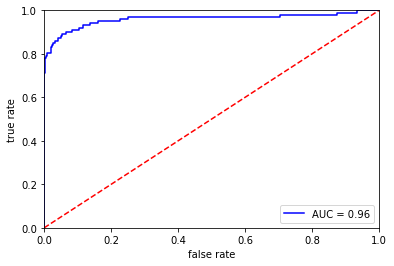

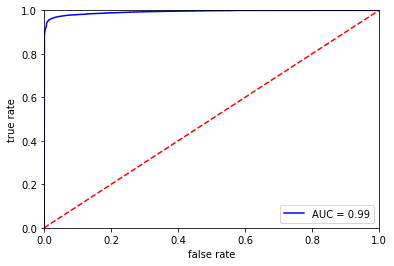

,Data Processing,Precision,Recall,AUC
0,without SMOTE,0.863636,0.564356,0.960542
1,with SMOTE,0.979314,0.960734,0.993311


In [37]:
# Precision, Recall and AUC in the test set of logistic regression
precision = precision_score(y_test, lr_y_pred)
precision_smote = precision_score(y_test_smote, lr_smote_pred)

recall = recall_score(y_test, lr_y_pred)
recall_smote = recall_score(y_test_smote, lr_smote_pred)

# Without smote, AUC
fprcat, tprcat, thresholds = roc_curve(y_test, lr_y_pred_prob)
AUC = metrics.auc(fprcat, tprcat)
plt.plot(fprcat, tprcat, 'b', label='AUC = %0.2f' % AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('true rate')
plt.xlabel('false rate')
plt.show()

# With smote, AUC
fprcat, tprcat, thresholds = roc_curve(y_test_smote, lr_smote_pred_prob)
AUC_smote = metrics.auc(fprcat, tprcat)
plt.plot(fprcat, tprcat, 'b', label='AUC = %0.2f' % AUC_smote)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('true rate')
plt.xlabel('false rate')
plt.show()

d = {'Data Processing': ['without SMOTE', 'with SMOTE'], 'Precision':[precision, precision_smote], 'Recall':[recall, recall_smote], 'AUC':[AUC, AUC_smote]}
final_df = pd.DataFrame(data=d)

final_df